# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 9. Getting data from a data frame

Make sure that you have the **puzzles.csv file** present in your working directory (see lecture 8).

## Advanced data frame indexing

In [1]:
using DataFrames
using CSV
using Plots
puzzles = CSV.read("puzzles.csv", DataFrame)

,PuzzleId,FEN
,String7,String
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16
4,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15
5,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19
6,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58
7,000tp,4r3/5pk1/1p3np1/3p3p/2qQ4/P4N1P/1P3RP1/7K w - - 6 34
8,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK1 b - - 1 17
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1 b - - 1 20


### Getting a reduced puzzles data frame

In [2]:
using Statistics
plays_lo = median(puzzles.NbPlays)

246.0

In [3]:
puzzles.NbPlays .> plays_lo

2132989-element BitVector:
 1
 1
 1
 1
 1
 0
 0
 1
 1
 0
 0
 0
 0
 ⋮
 1
 0
 1
 0
 1
 1
 1
 0
 0
 1
 1
 0

In [4]:
puzzles.NbPlays > plays_lo

LoadError: MethodError: no method matching isless(::Float64, ::Vector{Int64})
[0mClosest candidates are:
[0m  isless(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at C:\WORK\julia-1.7.3\share\julia\base\float.jl:460
[0m  isless([91m::AbstractVector[39m, ::AbstractVector) at C:\WORK\julia-1.7.3\share\julia\base\abstractarray.jl:2550
[0m  isless(::AbstractFloat, [91m::AbstractFloat[39m) at C:\WORK\julia-1.7.3\share\julia\base\operators.jl:184
[0m  ...

In [5]:
rating_lo = 1500

1500

In [6]:
rating_hi = quantile(puzzles.Rating, 0.99)

2658.0

In [7]:
rating_lo .< puzzles.Rating .< rating_hi

2132989-element BitVector:
 1
 1
 0
 0
 1
 0
 1
 1
 1
 0
 0
 0
 1
 ⋮
 1
 0
 1
 1
 1
 1
 1
 0
 1
 0
 1
 1

In [8]:
row_selector = (puzzles.NbPlays .> plays_lo) .&& (rating_lo .< puzzles.Rating .< rating_hi)

2132989-element BitVector:
 1
 1
 0
 0
 1
 0
 0
 1
 1
 0
 0
 0
 0
 ⋮
 1
 0
 1
 0
 1
 1
 1
 0
 0
 0
 1
 0

In [9]:
sum(row_selector)

513357

In [10]:
count(row_selector)

513357

In [11]:
good = puzzles[row_selector, ["Rating", "Popularity"]]

,Rating,Popularity
,Int64,Int64
1,1765,93
2,1525,97
3,1560,88
4,1822,90
5,2499,91
6,1555,96
7,1716,87
8,1981,92
9,1529,93


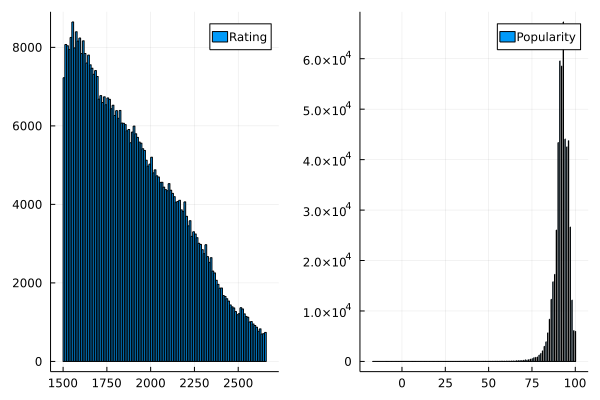

In [12]:
plot(histogram(good.Rating; label="Rating"),
     histogram(good.Popularity; label="Popularity"))

### Overview of allowed column selectors

#### Getting a cell

In [13]:
puzzles[1, "Rating"]

1765

#### Getting a column

In [14]:
puzzles[:, "Rating"]

2132989-element Vector{Int64}:
 1765
 1525
 1102
 1320
 1560
 1039
 2038
 1822
 2499
 1128
 1135
  991
 2148
    ⋮
 1611
 1401
 1547
 1965
 1641
 1907
 2069
  830
 1828
  980
 1783
 2481

#### DataFrameRow: creation and usage

In [15]:
row1 = puzzles[1, ["Rating", "Popularity"]]

,Rating,Popularity
,Int64,Int64
1,1765,93


In [16]:
row1["Rating"]

1765

In [17]:
row1[:Rating]

1765

In [18]:
row1[1]

1765

In [19]:
row1.Rating

1765

In [20]:
row1."Rating"

1765

#### Getting a data frame

In [21]:
good = puzzles[row_selector, ["Rating", "Popularity"]]

,Rating,Popularity
,Int64,Int64
1,1765,93
2,1525,97
3,1560,88
4,1822,90
5,2499,91
6,1555,96
7,1716,87
8,1981,92
9,1529,93


### Getting column names

In [22]:
names(puzzles, ["Rating", "Popularity"])

2-element Vector{String}:
 "Rating"
 "Popularity"

In [23]:
names(puzzles, [:Rating, :Popularity])

2-element Vector{String}:
 "Rating"
 "Popularity"

In [24]:
names(puzzles, [4, 6])

2-element Vector{String}:
 "Rating"
 "Popularity"

In [25]:
names(puzzles, [false, false, false, true, false, true, false,false, false])

2-element Vector{String}:
 "Rating"
 "Popularity"

In [26]:
names(puzzles, r"Rating")

2-element Vector{String}:
 "Rating"
 "RatingDeviation"

In [27]:
names(puzzles, Not([4, 6]))

7-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "RatingDeviation"
 "NbPlays"
 "Themes"
 "GameUrl"

In [28]:
names(puzzles, Not(r"Rating"))

7-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"

In [29]:
names(puzzles, Between("Rating", "Popularity"))

3-element Vector{String}:
 "Rating"
 "RatingDeviation"
 "Popularity"

In [30]:
names(puzzles, :)

9-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"

In [31]:
names(puzzles, All())

9-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"

In [32]:
names(puzzles, Cols(r"Rating", "NbPlays"))

3-element Vector{String}:
 "Rating"
 "RatingDeviation"
 "NbPlays"

In [33]:
names(puzzles, Cols(startswith("P")))

2-element Vector{String}:
 "PuzzleId"
 "Popularity"

In [34]:
names(puzzles, Real)

4-element Vector{String}:
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"

In [35]:
names(puzzles, AbstractString)

5-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Themes"
 "GameUrl"

### Overview of allowed row subsetting values

In [36]:
df_small = DataFrame(id=1:4)

,id
,Int64
1,1
2,2
3,3
4,4


In [37]:
df_small[[1, 3], :]

,id
,Int64
1,1
2,3


In [38]:
df_small[[true, false, true, false], :]

,id
,Int64
1,1
2,3


In [39]:
df_small[Not([2, 4]), :]

,id
,Int64
1,1
2,3


In [40]:
df_small[Not([false, true, false, true]), :]

,id
,Int64
1,1
2,3


In [41]:
df1 = puzzles[:, ["Rating", "Popularity"]];
df2 = puzzles[!, ["Rating", "Popularity"]];

In [42]:
df1 == df2

true

In [43]:
df1.Rating === puzzles.Rating

false

In [44]:
df1.Popularity === puzzles.Popularity

false

In [45]:
df2.Rating === puzzles.Rating

true

In [46]:
df2.Popularity === puzzles.Popularity

true

In [47]:
using BenchmarkTools
@btime $puzzles[:, ["Rating", "Popularity"]];

  4.851 ms (27 allocations: 32.55 MiB)


In [48]:
@btime $puzzles[!, ["Rating", "Popularity"]];

  892.857 ns (21 allocations: 1.70 KiB)


### Collection vs scalar when indexing a data frame

In [49]:
puzzles[1, 1]

"00008"

In [50]:
puzzles[[1], 1]

1-element Vector{String7}:
 "00008"

In [51]:
puzzles[1, [1]]

,PuzzleId
,String7
1,00008


In [52]:
puzzles[[1], [1]]

,PuzzleId
,String7
1,00008


### Making views of data frame objects

In [53]:
@view puzzles[1, 1]

0-dimensional view(::Vector{String7}, 1) with eltype String7:
"00008"

In [54]:
@view puzzles[[1], 1]

1-element view(::Vector{String7}, [1]) with eltype String7:
 "00008"

In [55]:
@view puzzles[1, [1]]

,PuzzleId
,String7
1,00008


In [56]:
@view puzzles[[1], [1]]

,PuzzleId
,String7
1,00008


In [57]:
@btime $puzzles[$row_selector, ["Rating", "Popularity"]];

  4.009 ms (22 allocations: 11.75 MiB)


In [58]:
@btime @view $puzzles[$row_selector, ["Rating", "Popularity"]];

  985.800 μs (12 allocations: 3.92 MiB)


In [59]:
parentindices(@view puzzles[row_selector, ["Rating", "Popularity"]])

([1, 2, 5, 8, 9, 16, 26, 36, 41, 48  …  2132963, 2132965, 2132968, 2132970, 2132978, 2132980, 2132982, 2132983, 2132984, 2132988], [4, 6])

## Analyzing the relationship between puzzle difficulty and popularity

### Calculation of mean puzzle popularity by its rating

In [60]:
describe(good)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,Rating,1900.03,1501,1854.0,2657,0,Int64
2,Popularity,91.9069,-17,92.0,100,0,Int64


In [61]:
rating_mapping = Dict{Int, Vector{Int}}() #A

Dict{Int64, Vector{Int64}}()

In [62]:
for (i, rating) in enumerate(good.Rating) #B
    if haskey(rating_mapping, rating) #C
        push!(rating_mapping[rating], i) #D
    else
        rating_mapping[rating] = [i] #E
    end
end

In [63]:
rating_mapping

Dict{Int64, Vector{Int64}} with 1157 entries:
  2108 => [225, 6037, 6254, 7024, 8113, 8679, 8887, 13131, 13291, 14227  …  500…
  2261 => [361, 2462, 5276, 6006, 6409, 6420, 9089, 10129, 12555, 13391  …  479…
  1953 => [655, 984, 1290, 1699, 2525, 2553, 3195, 3883, 5046, 5136  …  505368,…
  2288 => [864, 1023, 2019, 3475, 4164, 9424, 9972, 12368, 14745, 15355  …  494…
  1703 => [68, 464, 472, 826, 1097, 1393, 2042, 2110, 4251, 4923  …  504595, 50…
  2493 => [10, 853, 2795, 4887, 8400, 23267, 31375, 34203, 43640, 47174  …  472…
  1956 => [712, 2716, 3523, 4473, 5321, 5483, 7546, 9133, 10575, 12070  …  5034…
  1546 => [1707, 1922, 3086, 3361, 4666, 4800, 5064, 5358, 5805, 6826  …  50366…
  2350 => [1850, 6161, 10732, 15720, 17971, 22698, 22724, 26402, 33497, 36798  …
  1812 => [352, 1348, 1404, 4447, 4749, 6404, 7520, 8192, 8328, 9430  …  508740…
  2291 => [360, 6041, 6472, 7228, 10135, 12176, 12982, 13055, 14305, 16099  …  …
  2015 => [296, 301, 1260, 2780, 3355, 3885, 4198, 4515, 4527, 

In [64]:
good[rating_mapping[2108], :]

,Rating,Popularity
,Int64,Int64
1,2108,95
2,2108,90
3,2108,90
4,2108,93
5,2108,95
6,2108,91
7,2108,95
8,2108,95
9,2108,93


In [65]:
unique(good[rating_mapping[2108], :].Rating)

1-element Vector{Int64}:
 2108

In [66]:
using Statistics
mean(good[rating_mapping[2108], "Popularity"])
91.64989059080963

91.64989059080963

In [67]:
ratings = unique(good.Rating)

1157-element Vector{Int64}:
 1765
 1525
 1560
 1822
 2499
 1555
 1716
 1981
 1529
 2493
 2057
 2440
 1531
    ⋮
 2575
 2547
 2625
 2406
 2647
 2447
 2517
 2635
 2595
 2616
 2619
 2631

In [68]:
mean_popularities = map(ratings) do rating
    indices = rating_mapping[rating]
    popularities = good[indices, "Popularity"]
    return mean(popularities)
end

1157-element Vector{Float64}:
 92.6219512195122
 91.7780580075662
 91.79565772669221
 92.63253012048193
 89.75187969924812
 92.11891891891892
 92.31039325842697
 92.39688715953308
 91.97677261613691
 89.36283185840708
 92.34831460674157
 89.99259259259259
 91.6650124069479
  ⋮
 89.71134020618557
 89.6504854368932
 89.34567901234568
 90.08333333333333
 89.92307692307692
 89.4074074074074
 90.43478260869566
 89.68055555555556
 89.37068965517241
 88.87323943661971
 89.56140350877193
 89.34782608695652

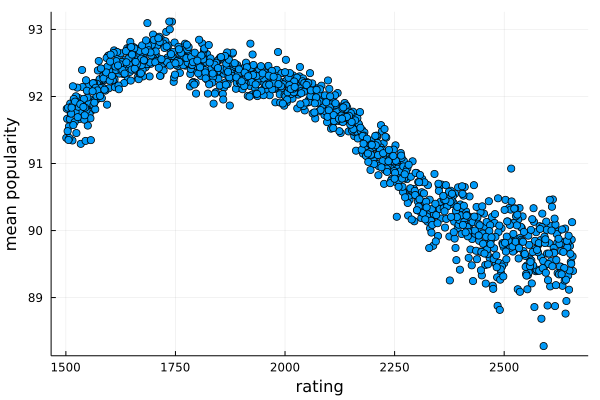

In [69]:
using Plots
scatter(ratings, mean_popularities;
xlabel="rating", ylabel="mean popularity", legend=false)

### Fitting LOESS regression

In [70]:
using Loess
model = loess(ratings, mean_popularities);
ratings_predict = float(sort(ratings))

1157-element Vector{Float64}:
 1501.0
 1502.0
 1503.0
 1504.0
 1505.0
 1506.0
 1507.0
 1508.0
 1509.0
 1510.0
 1511.0
 1512.0
 1513.0
    ⋮
 2646.0
 2647.0
 2648.0
 2649.0
 2650.0
 2651.0
 2652.0
 2653.0
 2654.0
 2655.0
 2656.0
 2657.0

In [71]:
popularity_predict = predict(model, ratings_predict)

1157-element Vector{Float64}:
 91.78127959282982
 91.78699303591367
 91.7926814281816
 91.79834480374923
 91.80398319673219
 91.80959664124609
 91.81518517140653
 91.82074882132912
 91.82628762512951
 91.83180161692329
 91.83729083082606
 91.84275530095348
 91.84819506142114
  ⋮
 89.58583557381604
 89.58519462468561
 89.58456892133633
 89.5839584814613
 89.58336332275364
 89.58278346290643
 89.5822189196128
 89.58166971056582
 89.5811358534586
 89.58061736598427
 89.58011426583589
 89.57962657070658

In [72]:
methods(predict)

# 3 methods for generic function "predict":
[1] predict(model::Loess.LoessModel{T}, z::T) where T<:AbstractFloat in Loess at C:\Users\bogum\.julia\packages\Loess\dv7Ad\src\Loess.jl:138
[2] predict(model::Loess.LoessModel{T}, zs::AbstractVector{T}) where T<:AbstractFloat in Loess at C:\Users\bogum\.julia\packages\Loess\dv7Ad\src\Loess.jl:143
[3] predict(model::Loess.LoessModel{T}, zs::AbstractMatrix{T}) where T<:AbstractFloat in Loess at C:\Users\bogum\.julia\packages\Loess\dv7Ad\src\Loess.jl:181

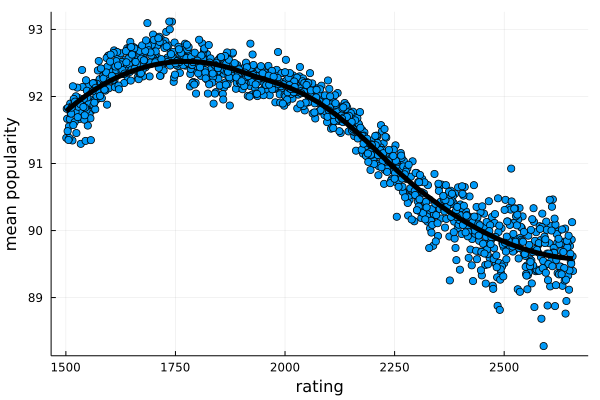

In [73]:
plot!(ratings_predict, popularity_predict; width=5, color="black")

In [74]:
combine(groupby(good, :Rating), :Popularity => mean)

,Rating,Popularity_mean
,Int64,Float64
1,1501,91.3822
2,1502,91.8164
3,1503,91.6671
4,1504,91.4829
5,1505,91.8323
6,1506,91.3514
7,1507,91.5517
8,1508,91.3804
9,1509,91.6611
